In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Modify ecut

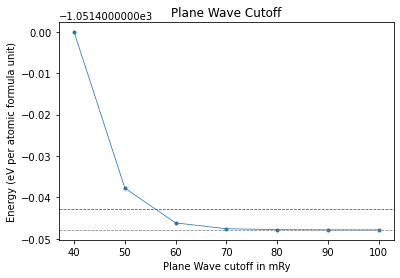

In [282]:
ecut_x = np.linspace(20,100, 9)
ecut_y_Ry = pd.read_fwf('./Data/energyEcut.txt', header=None)
ecut_y_eV = ecut_y_Ry*13.605703976

plt.plot(ecut_x[2:], ecut_y_eV.iloc[2:], marker = '.',ls='-', lw=0.75)
plt.axhline(ecut_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75)
plt.axhline(ecut_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75)
plt.xlabel('Plane Wave cutoff in mRy')
plt.ylabel('Energy (eV per atomic formula unit)')
plt.title('Plane Wave Cutoff')
plt.show()

In [3]:
### THIS USES 4 4 4 Kpoints!

## Modify k-points

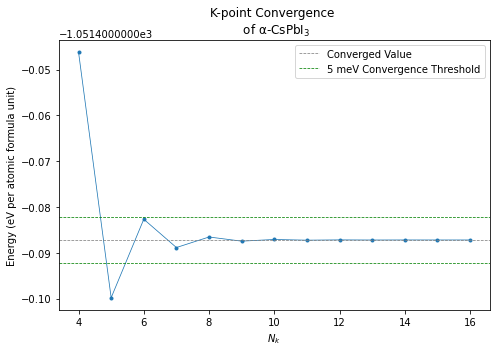

In [4]:
Kpoint_x = np.linspace(4,16, 13)
Kpoints_y_Ry = pd.read_fwf('./Data/energyKpoints.txt', header=None)
Kpoints_y_eV = Kpoints_y_Ry*13.605703976

plt.figure(figsize=[7,5])
plt.plot(Kpoint_x, Kpoints_y_eV, marker = '.',ls='-', lw=0.75)
plt.axhline(Kpoints_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75, label = "Converged Value")
plt.axhline(Kpoints_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75, label = '5 meV Convergence Threshold')
plt.axhline(Kpoints_y_eV.iloc[-1,0]-0.005, color='green', ls='--', lw =0.75)
plt.xlabel('$N_k$')
plt.ylabel('Energy (eV per atomic formula unit)')
plt.title("K-point Convergence \n of α-CsPbI$_3$")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
### this uses ecut = 60

#Reading the output file, the unit cell volume 
# corresponds exactly to optimum so Check!

## bands and DOS time

In [261]:
def plotbands(data_bands, color):
    k = np.unique(data_bands[:, 0])
    bands = np.reshape(data_bands[:, 1], (-1, len(k)))

    for band in range(len(bands)):
        ax1.plot(k, bands[band, :], linewidth=1, alpha=0.5, c=color)

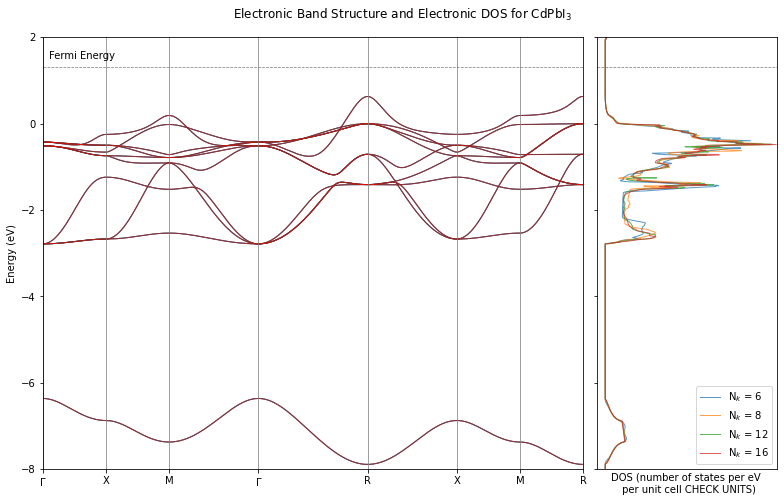

In [131]:

dos6 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_666.dat')
dos8 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_888.dat')
dos12 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_121212.dat')
dos16 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_161616.dat')

data_bands6 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_666.dat.gnu')
data_bands8 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_888.dat.gnu')
data_bands12 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_121212.dat.gnu')
data_bands16 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_161616.dat.gnu')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

ax1_width = 0.75  # 2/3 of total width
ax2_width = 1 - ax1_width

ax1.set_position([0.0, 0.0, ax1_width, 1.0])
ax2.set_position([ax1_width+0.02, 0.0, ax2_width, 1.0])

#plot em
plotbands(data_bands6,'k')
plotbands(data_bands8,'blue')
plotbands(data_bands12,'green')
plotbands(data_bands16,'red')


# DOS is column =1, PDOS: columns = 2, coumns 3 idk
ax2.plot(dos6.iloc[:,1],dos6.iloc[:,0],linewidth=1, alpha=0.75,
        label = 'N$_k$ = 6')
ax2.plot(dos8.iloc[:,1],dos8.iloc[:,0],linewidth=1, alpha=0.75,
        label = 'N$_k$ = 8')
ax2.plot(dos12.iloc[:,1],dos12.iloc[:,0],linewidth=1, alpha=0.75,
        label = 'N$_k$ = 12')
ax2.plot(dos16.iloc[:,1],dos16.iloc[:,0],linewidth=1, alpha=0.75,
        label = 'N$_k$ = 16')

path = ['$\Gamma$','X','M','$\Gamma$','R','X','M', 'R']

ax1.axvline(0.0000, lw =0.75, color = 'grey')
ax1.axvline(0.5000, lw =0.75, color = 'grey')
ax1.axvline(1.0000, lw =0.75, color = 'grey')
ax1.axvline(1.7071, lw =0.75, color = 'grey')
ax1.axvline(2.5731, lw =0.75, color = 'grey')
ax1.axvline(3.2802, lw =0.75, color = 'grey')
ax1.axvline(3.7802, lw =0.75, color = 'grey')
ax1.axvline(4.2802, lw =0.75, color = 'grey')

ax1.set_xticks([0.0000,0.5000,1.0000,1.7071,2.5731,3.2802,3.7802,4.2802])
ax1.set_xticklabels(path)

plt.ylim(-8,2)

ax1.set_xlim(0,4.2802)
ax2.set_xlim(-1,22)

plt.suptitle("Electronic Band Structure and Electronic DOS for CdPbI$_3$",y=1.07 )

ax1.set_ylabel("Energy (eV)")
ax2.set_xlabel("DOS (number of states per eV \n per unit cell CHECK UNITS)")
ax2.set_xticklabels([])
ax2.set_xticks([])

ax1.axhline(1.3031, ls ='--', color='gray', lw=0.75)
ax2.axhline(1.3031, ls ='--', color='gray', lw=0.75)
ax1.text(0.05, 1.5, "Fermi Energy")

plt.legend()
plt.show()

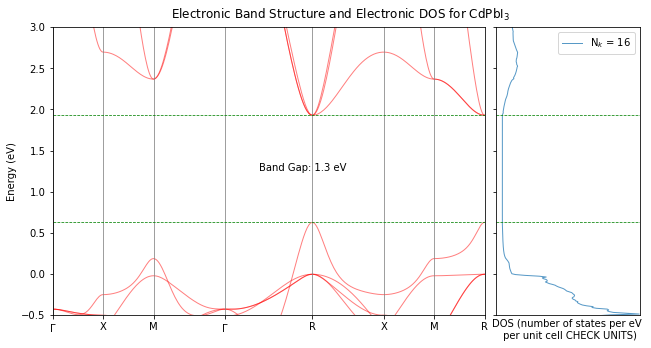

In [130]:

dos6 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_666.dat')
dos8 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_888.dat')
dos12 = pd.read_fwf('./Data/nscf/CsPbI3_dos_tetra_121212.dat')
dos16 = pd.read_fwf('./Data/nscf/CsPbI3_morebands.dat')

#data_bands6 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_666.dat.gnu')
#data_bands8 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_888.dat.gnu')
#data_bands12 = np.loadtxt('./Data/nscf/CsPbI3_dos_bands_121212.dat.gnu')
data_bands16 = np.loadtxt('./Data/nscf/CsPbI3_more_bands_161616.dat.gnu')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ax1_width = 0.75  # 2/3 of total width
ax2_width = 1 - ax1_width

ax1.set_position([0.0, 0.0, ax1_width, 1.0])
ax2.set_position([ax1_width+0.02, 0.0, ax2_width, 1.0])

#plot em
#plotbands(data_bands6,'k')
#plotbands(data_bands8,'blue')
#plotbands(data_bands12,'green')
plotbands(data_bands16,'red')


## DOS is column =1, PDOS: columns = 2, coumns 3 idk
#ax2.plot(dos6.iloc[:,1],dos6.iloc[:,0],linewidth=1, alpha=0.75,
#        label = 'N$_k$ = 6')
#ax2.plot(dos8.iloc[:,1],dos8.iloc[:,0],linewidth=1, alpha=0.75,
#        label = 'N$_k$ = 8')
#ax2.plot(dos12.iloc[:,1],dos12.iloc[:,0],linewidth=1, alpha=0.75,
#        label = 'N$_k$ = 12')
ax2.plot(dos16.iloc[:,1],dos16.iloc[:,0],linewidth=1, alpha=0.75,
        label = 'N$_k$ = 16')

path = ['$\Gamma$','X','M','$\Gamma$','R','X','M', 'R']

ax1.axvline(0.0000, lw =0.75, color = 'grey')
ax1.axvline(0.5000, lw =0.75, color = 'grey')
ax1.axvline(1.0000, lw =0.75, color = 'grey')
ax1.axvline(1.7071, lw =0.75, color = 'grey')
ax1.axvline(2.5731, lw =0.75, color = 'grey')
ax1.axvline(3.2802, lw =0.75, color = 'grey')
ax1.axvline(3.7802, lw =0.75, color = 'grey')
ax1.axvline(4.2802, lw =0.75, color = 'grey')

ax1.set_xticks([0.0000,0.5000,1.0000,1.7071,2.5731,3.2802,3.7802,4.2802])
ax1.set_xticklabels(path)

plt.ylim(-0.5,3)

ax1.set_xlim(0,4.2802)
ax2.set_xlim(-1,22)

plt.suptitle("Electronic Band Structure and Electronic DOS for CdPbI$_3$",y=1.07 )

ax1.set_ylabel("Energy (eV)")
ax2.set_xlabel("DOS (number of states per eV \n per unit cell CHECK UNITS)")
ax2.set_xticklabels([])
ax2.set_xticks([])

#ax1.axhline(1.3031, ls ='--', color='gray', lw=0.75)
#ax2.axhline(1.3031, ls ='--', color='gray', lw=0.75)

ax1.axhline(0.63, ls ='--', color='green', lw=0.75)
ax1.axhline(1.93, ls ='--', color='green', lw=0.75)

ax2.axhline(0.63, ls ='--', color='green', lw=0.75)
ax2.axhline(1.93, ls ='--', color='green', lw=0.75)


ax1.text(2.05, 1.25, "Band Gap: " + str(round((1.93-0.63),4))+" eV")

plt.legend()
plt.show()

## Comparison to paper:

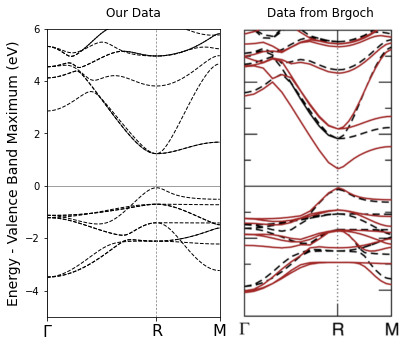

In [286]:
def plotbands1(data_bands, color):
    k = np.unique(data_bands[:, 0])
    bands = np.reshape(data_bands[:, 1], (-1, len(k)))

    for band in range(len(bands)):
        ax1.plot(k, bands[band, :], linewidth=1, c=color, ls='--')

paper_comp = np.loadtxt('Data/same_path_as_paper/CsPbI3_bands_161616.dat.gnu')

#fermi_adjust
paper_comp[:,1] = paper_comp[:,1]-0.7#

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

ax1_width = 0.3  # width
ax2_width = 1 - ax1_width

ax1.set_position([0.0, 0.0, ax1_width, 1.0])
ax2.set_position([ax1_width-0.05, -0.08, 0.45, 1.1])

import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('./Data/same_path_as_paper/paper_path.png')


plotbands1(paper_comp,'black')
ax2.imshow(img)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_frame_on(False)

ax1.set_ylabel("Energy - Valence Band Maximum (eV)")

ax1.axvline(0.0000, lw =0.75, color = 'grey')
ax1.axvline(0.8660,ls ='-.', lw =0.75, color = 'grey', dashes=[3, 2])
ax1.axvline(1.3660, lw =0.75, color = 'grey')

ax1.axhline(0, ls ='-', color='gray', lw=0.75)

path = ['$\Gamma$','R','M']
ax1.set_xticks([0.0000,0.8660, 1.3660])
ax1.set_xticklabels(path)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels()):
    item.set_fontsize(16)
for item in ([ax1.yaxis.label]):
    item.set_fontsize(14)
    
    
ax1.set_ylim(-5,6)
ax1.set_xlim(0,1.3660)

#plt.suptitle("Data Comparison to Paper",y=1.1, x = .3)
ax1.set_title("Our Data", y=1.02)
ax2.set_title("Data from Brgoch", y=1.0)

plt.show()

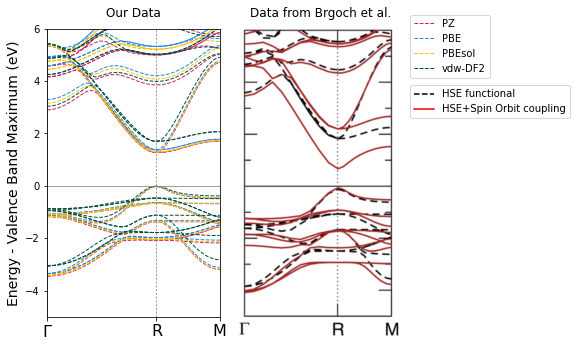

In [342]:
def plotbands1(data_bands, color, label):
    k = np.unique(data_bands[:, 0])
    bands = np.reshape(data_bands[:, 1], (-1, len(k)))

    for band in range(len(bands)-1):
        ax1.plot(k, bands[band, :], linewidth=1, c=color, ls='--')
    
    for band in range(len(bands)-1, len(bands)):
        ax1.plot(k, bands[band, :], linewidth=1, c=color, ls='--', label = label)

PZ = np.loadtxt('Data/same_path_as_paper/CsPbI3_bands_PZ_161616.dat.gnu')
PBE = np.loadtxt('Data/same_path_as_paper/CsPbI3_bands_PBE_161616.dat')
PBEsol = np.loadtxt('Data/same_path_as_paper/CsPbI3_bands_PBEsol_161616.dat')
vdw = np.loadtxt('Data/same_path_as_paper/CsPbI3_bands_vd2-DF2_161616.dat')

#fermi_adjust
PZ[:,1] = PZ[:,1]-0.659
PBE[:,1] = PBE[:,1]-0.719
PBEsol[:,1] = PBEsol[:,1]-0.739
vdw[:,1] = vdw[:,1]-0.319

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

ax1_width = 0.3  # width
ax2_width = 1 - ax1_width

ax1.set_position([0.0, 0.0, ax1_width, 1.0])
ax2.set_position([ax1_width-0.05, -0.08, 0.45, 1.1])

import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('./Data/same_path_as_paper/paper_path.png')

color = ['#D81B60', '#1E88E5', '#FFC107', '#004D40']

plotbands1(PZ,    color[0],label = 'PZ')
plotbands1(PBE,   color[1],label = 'PBE')
plotbands1(PBEsol,color[2],label = 'PBEsol')
plotbands1(vdw,   color[3],label = 'vdw-DF2')

ax2.imshow(img, label = 'Dashed black line: HSE functional\nRed line HSE+Spin Orbit coupling')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_frame_on(False)

ax1.set_ylabel("Energy - Valence Band Maximum (eV)")

ax1.axvline(0.0000, lw =0.75, color = 'grey')
ax1.axvline(0.8660,ls ='-.', lw =0.75, color = 'grey', dashes=[3, 2])
ax1.axvline(1.3660, lw =0.75, color = 'grey')

ax1.axhline(0, ls ='-', color='gray', lw=0.75)

path = ['$\Gamma$','R','M']
ax1.set_xticks([0.0000,0.8660, 1.3660])
ax1.set_xticklabels(path)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels()):
    item.set_fontsize(16)
for item in ([ax1.yaxis.label]):
    item.set_fontsize(14)
    
    
# Add dashed black line with HSE functional
line1, = ax.plot(x, y, '--k', label='HSE functional')

# Add red line with HSE+Spin Orbit coupling
line2, = ax.plot(x, y + 1, 'r', label='HSE+Spin Orbit coupling')

# Add legend with handles for both lines
handles, labels = ax.get_legend_handles_labels()
ax2.legend(handles=[line1, line2], labels=labels, loc = (1.01, 0.7))
ax1.set_ylim(-5,6)
ax1.set_xlim(0,1.3660)

#plt.suptitle("Data Comparison to Paper",y=1.1, x = .3)
ax1.set_title("Our Data", y=1.02)
ax2.set_title("Data from Brgoch et al.", y=1.0)

ax1.legend(loc = (2.1,0.83))
#ax2.legend(loc = (1.1,0.2))
plt.savefig('pics/comparison', dpi=300, bbox_inches='tight')
